In [56]:
import pandas as pd
from matplotlib import pyplot as plt


In [4]:
df1 = pd.read_csv('.././data/monday.csv', sep=';')
df1

,timestamp,customer_no,location
0,2019-09-02 07:03:00,1,dairy
1,2019-09-02 07:03:00,2,dairy
2,2019-09-02 07:04:00,3,dairy
3,2019-09-02 07:04:00,4,dairy
4,2019-09-02 07:04:00,5,spices
...,...,...,...
4879,2019-09-02 21:49:00,1442,checkout
4880,2019-09-02 21:49:00,1444,checkout
4881,2019-09-02 21:49:00,1445,dairy
4882,2019-09-02 21:50:00,1446,dairy


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   timestamp    4884 non-null   object
 1   customer_no  4884 non-null   int64 
 2   location     4884 non-null   object
dtypes: int64(1), object(2)
memory usage: 114.6+ KB


In [7]:
df1['timestamp'] = pd.to_datetime(df1['timestamp'])

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   timestamp    4884 non-null   datetime64[ns]
 1   customer_no  4884 non-null   int64         
 2   location     4884 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 114.6+ KB


## Calculate the total number of customers in each section

In [30]:
df1.groupby(['location'])[['customer_no']].count()

,customer_no
location,
checkout,1437
dairy,895
drinks,797
fruit,1005
spices,750


In [23]:
df1.groupby(['location', 'customer_no']).count()

timestamp
location customer_no           
checkout 1                    1
         2                    1
         3                    1
         4                    1
         5                    1
...                         ...
spices   1437                 1
         1438                 1
         1440                 1
         1441                 1
         1444                 1

[4229 rows x 1 columns]

In [18]:
df1['customer_no'].unique()

array([   1,    2,    3, ..., 1445, 1446, 1447])

## Calculate the total number of customers in each section over time

In [37]:
df_sub = df1.groupby(['location', 'timestamp'])[['customer_no']].count()


<Axes: xlabel='location,timestamp'>

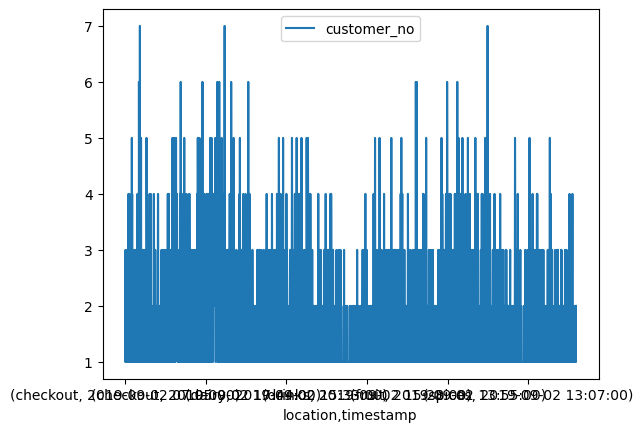

In [38]:
df_sub.plot(kind='line')

In [54]:
df_sub2 = df1.groupby(by=['timestamp', 'location'])[['location']].count().rename({'location': 'location2'}, axis=1)



In [55]:
df_sub2

location2
timestamp           location           
2019-09-02 07:03:00 dairy             2
2019-09-02 07:04:00 dairy             2
                    fruit             1
                    spices            3
2019-09-02 07:05:00 checkout          2
...                                 ...
2019-09-02 21:49:00 dairy             1
                    fruit             2
                    spices            2
2019-09-02 21:50:00 dairy             1
                    fruit             1

[2797 rows x 1 columns]

In [67]:
df_sub2.columns

Index(['location2'], dtype='object')

In [68]:
df_sub2.groupby(['location2']).count()

""
location2
1
2
3
4
5
6
7


<Axes: xlabel='timestamp,location'>

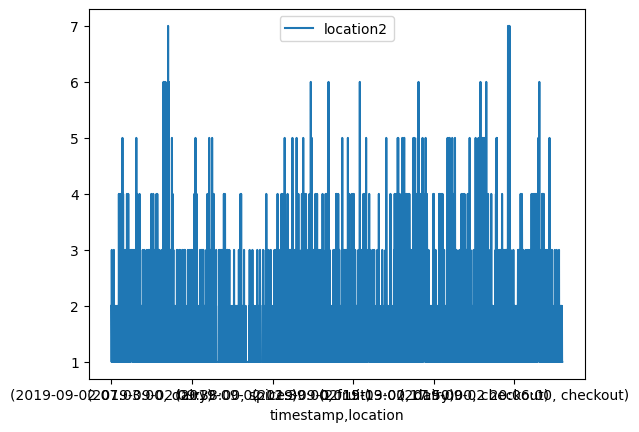

In [60]:
df_sub2.plot()
#plt.show()

## Display the number of customers at checkout over time

In [76]:
df_checkout = df1[df1['location']=='checkout']


<Axes: xlabel='timestamp'>

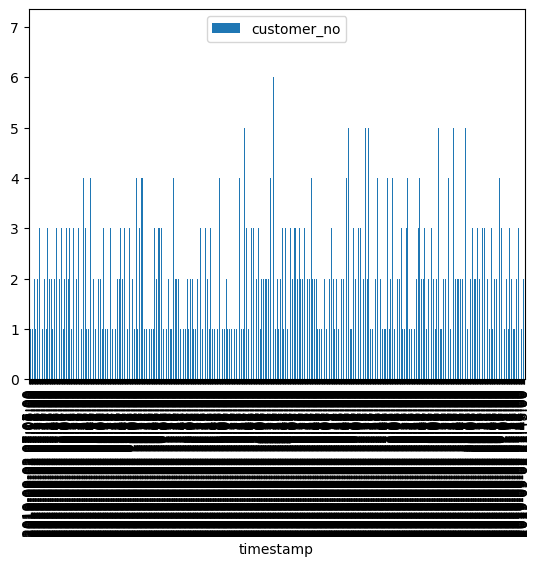

In [97]:
df_checkout.groupby('timestamp')[['customer_no']].count().plot(kind='bar')

In [99]:
df_checkout.groupby('timestamp')[['customer_no']].count().min()

customer_no    1
dtype: int64

## Calculate the time each customer spent in the market

In [119]:
df_cus = df1.groupby('customer_no')[['timestamp']].count() 

In [120]:
df_cus

,timestamp
customer_no,
1,2
2,2
3,2
4,2
5,2
...,...
1443,2
1444,2
1445,1


In [146]:
df_cus['timestamp'].max()

18

In [121]:
df_cus[df_cus['timestamp']< 2]

,timestamp
customer_no,
1439,1
1445,1
1446,1
1447,1


In [122]:
df_cus['in'] = df1.groupby('customer_no')[['timestamp']].first()

In [123]:
df_cus['out'] = df1.groupby('customer_no')[['timestamp']].last()

In [135]:
df_cus['time spent'] = (df_cus['out'] - df_cus['in'])

In [126]:
df_cus.head(20)


,timestamp,in,out,time spent
customer_no,,,,
1,2,2019-09-02 07:03:00,2019-09-02 07:05:00,0 days 00:02:00
2,2,2019-09-02 07:03:00,2019-09-02 07:06:00,0 days 00:03:00
3,2,2019-09-02 07:04:00,2019-09-02 07:06:00,0 days 00:02:00
4,2,2019-09-02 07:04:00,2019-09-02 07:08:00,0 days 00:04:00
5,2,2019-09-02 07:04:00,2019-09-02 07:05:00,0 days 00:01:00
6,8,2019-09-02 07:04:00,2019-09-02 07:29:00,0 days 00:25:00
7,5,2019-09-02 07:04:00,2019-09-02 07:13:00,0 days 00:09:00
8,2,2019-09-02 07:04:00,2019-09-02 07:07:00,0 days 00:03:00
9,3,2019-09-02 07:06:00,2019-09-02 07:13:00,0 days 00:07:00


In [133]:
df_cus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1447 entries, 1 to 1447
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype          
---  ------      --------------  -----          
 0   timestamp   1447 non-null   int64          
 1   in          1447 non-null   datetime64[ns] 
 2   out         1447 non-null   datetime64[ns] 
 3   time spent  1447 non-null   timedelta64[ns]
dtypes: datetime64[ns](2), int64(1), timedelta64[ns](1)
memory usage: 56.5 KB


## Calculate the total number of customers in the supermarket over time.

In [290]:
df_time = df1.groupby('timestamp')[['customer_no']].count()

<Axes: xlabel='timestamp'>

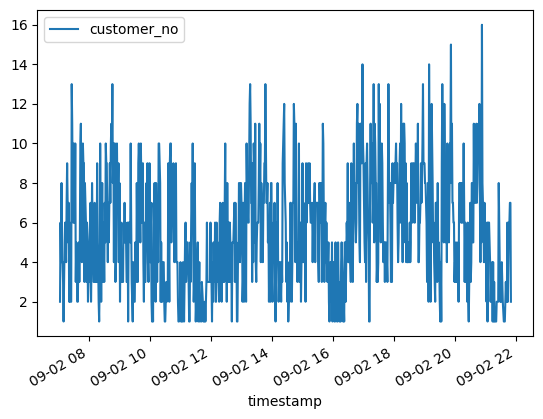

In [141]:
df_time.plot(kind='line')

In [291]:
df_time

,customer_no
timestamp,
2019-09-02 07:03:00,2
2019-09-02 07:04:00,6
2019-09-02 07:05:00,4
2019-09-02 07:06:00,8
2019-09-02 07:07:00,4
...,...
2019-09-02 21:46:00,6
2019-09-02 21:47:00,6
2019-09-02 21:48:00,7


In [292]:
sum(df_time['customer_no'])

4884

In [143]:
df_time['customer_no'].max()

16

In [144]:
df_time['customer_no'].min()

1

## Our business managers think that the first section customers visit follows a different pattern than the following ones. Plot the distribution of customers of their first visited section versus following sections (treat all sections visited after the first as “following”).

In [153]:
df1.groupby('customer_no')[['location']].first()

,location
customer_no,
1,dairy
2,dairy
3,dairy
4,dairy
5,spices
...,...
1443,fruit
1444,spices
1445,dairy


In [182]:
df_first_second = df1.groupby('customer_no')[['location']].nth([0,1])

In [183]:
df_first_second.head(20)

,location
customer_no,
1,dairy
1,checkout
2,dairy
2,checkout
3,dairy
3,checkout
4,dairy
4,checkout
5,spices


In [163]:
df1.groupby('customer_no')[['location', 'timestamp']].value_counts(sort=True, ascending=True)

customer_no  location  timestamp          
1            checkout  2019-09-02 07:05:00    1
             dairy     2019-09-02 07:03:00    1
2            dairy     2019-09-02 07:03:00    1
             checkout  2019-09-02 07:06:00    1
3            dairy     2019-09-02 07:04:00    1
                                             ..
1444         spices    2019-09-02 21:48:00    1
             checkout  2019-09-02 21:49:00    1
1445         dairy     2019-09-02 21:49:00    1
1446         dairy     2019-09-02 21:50:00    1
1447         fruit     2019-09-02 21:50:00    1
Length: 4884, dtype: int64

In [175]:
first_visit = df1.groupby('customer_no')[['location', 'timestamp']].first()


In [180]:
first_visit

,location,timestamp
customer_no,,
1,dairy,2019-09-02 07:03:00
2,dairy,2019-09-02 07:03:00
3,dairy,2019-09-02 07:04:00
4,dairy,2019-09-02 07:04:00
5,spices,2019-09-02 07:04:00
...,...,...
1443,fruit,2019-09-02 21:47:00
1444,spices,2019-09-02 21:48:00
1445,dairy,2019-09-02 21:49:00


In [170]:
df1

,timestamp,customer_no,location
0,2019-09-02 07:03:00,1,dairy
1,2019-09-02 07:03:00,2,dairy
2,2019-09-02 07:04:00,3,dairy
3,2019-09-02 07:04:00,4,dairy
4,2019-09-02 07:04:00,5,spices
...,...,...,...
4879,2019-09-02 21:49:00,1442,checkout
4880,2019-09-02 21:49:00,1444,checkout
4881,2019-09-02 21:49:00,1445,dairy
4882,2019-09-02 21:50:00,1446,dairy


In [193]:
df_first_second = df1.groupby('customer_no')[['location']]

In [194]:
df_first_second

In [199]:
type(list(df_first_second)[516])

tuple

In [206]:
list(df_first_second)[516][1]

,location
1723,dairy
1740,fruit
1743,checkout


In [208]:
list(df_first_second)[516][1]['location']


1723       dairy
1740       fruit
1743    checkout
Name: location, dtype: object

In [207]:

type(list(df_first_second)[516][1])

pandas.core.frame.DataFrame

In [216]:
import numpy as np

a = np.array([0,0,0,0,0,0])

In [217]:
a

array([0, 0, 0, 0, 0, 0])

In [220]:
i = 0
a = np.insert(a, i, 1)

In [221]:
a

array([1, 0, 0, 0, 1, 0, 0, 0])

In [222]:
df_total = pd.read_pickle('cus_concat_res_entr_checkout')
df_total

,customer_no,location
timestamp,,
2019-09-04 06:59:00,1,entrance
2019-09-04 07:00:00,1,fruit
2019-09-04 07:01:00,1,fruit
2019-09-04 07:02:00,1,checkout
2019-09-04 06:59:00,2,entrance
...,...,...
2019-09-06 21:50:00,7444,drinks
2019-09-06 21:51:00,7444,checkout
2019-09-06 21:49:00,7445,entrance


In [245]:
df_total_ent = df_total[df_total['location'] == 'entrance']

In [246]:
df_total_ent

,customer_no,location
timestamp,,
2019-09-04 06:59:00,1,entrance
2019-09-04 06:59:00,2,entrance
2019-09-04 06:59:00,3,entrance
2019-09-04 06:59:00,4,entrance
2019-09-04 06:59:00,5,entrance
...,...,...
2019-09-06 21:47:00,7441,entrance
2019-09-06 21:47:00,7442,entrance
2019-09-06 21:47:00,7443,entrance


In [297]:
df_time = df_total_ent.groupby('timestamp')[['customer_no']].count()


In [298]:
df_time

,customer_no
timestamp,
2019-09-02 07:02:00,2
2019-09-02 07:03:00,6
2019-09-02 07:05:00,6
2019-09-02 07:06:00,2
2019-09-02 07:10:00,1
...,...
2019-09-06 21:40:00,1
2019-09-06 21:45:00,2
2019-09-06 21:46:00,2


In [299]:
df_time['customer_no'].max()

11

In [300]:
df_time['customer_no'].min()


1

<Axes: xlabel='timestamp'>

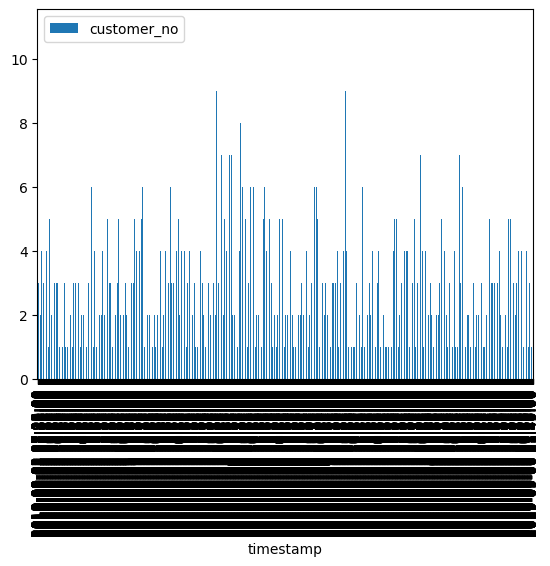

In [301]:
df_time.plot(kind='bar')

In [228]:
import seaborn as sns

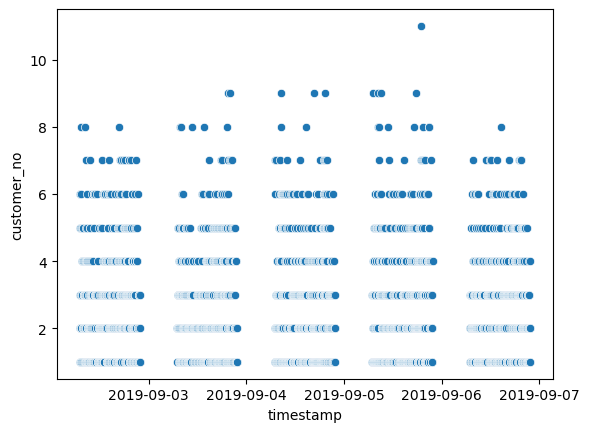

In [302]:
sns.scatterplot(x='timestamp', y='customer_no', data=df_time);

In [303]:
type(df_time.index[0])

pandas._libs.tslibs.timestamps.Timestamp

In [304]:
df_time['hour'] = df_time.index.hour

In [305]:
df_time['minute'] = df_time.index.minute


In [306]:
df_time

,customer_no,hour,minute
timestamp,,,
2019-09-02 07:02:00,2,7,2
2019-09-02 07:03:00,6,7,3
2019-09-02 07:05:00,6,7,5
2019-09-02 07:06:00,2,7,6
2019-09-02 07:10:00,1,7,10
...,...,...,...
2019-09-06 21:40:00,1,21,40
2019-09-06 21:45:00,2,21,45
2019-09-06 21:46:00,2,21,46


In [307]:
df_time_hourly = df_time.groupby('hour')[['customer_no']].sum()

In [330]:
type(df_time_hourly)

pandas.core.frame.DataFrame

In [308]:
df_time_hourly

,customer_no
hour,
6,10
7,491
8,707
9,449
10,397
11,338
12,398
13,528
14,489


array([[<Axes: title={'center': 'customer_no'}>]], dtype=object)

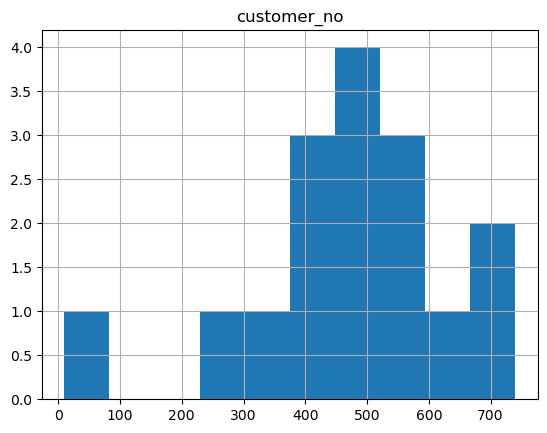

In [309]:
df_time_hourly.hist()

In [314]:
df_time_minute = df_time.groupby('minute')[['customer_no']].sum()



In [332]:
df_time_hourly

,customer_no
hour,
6,10
7,491
8,707
9,449
10,397
11,338
12,398
13,528
14,489


<Axes: xlabel='minute'>

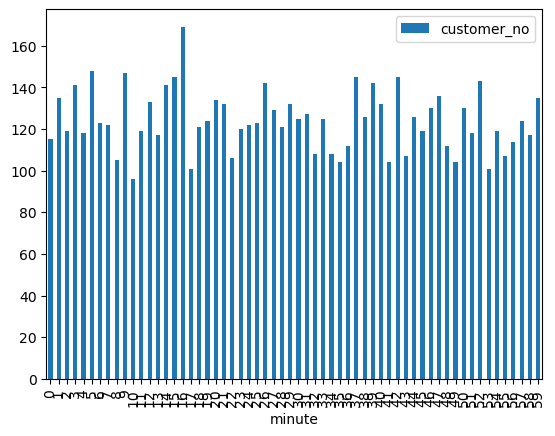

In [288]:
df_time_minute.plot(kind='bar')

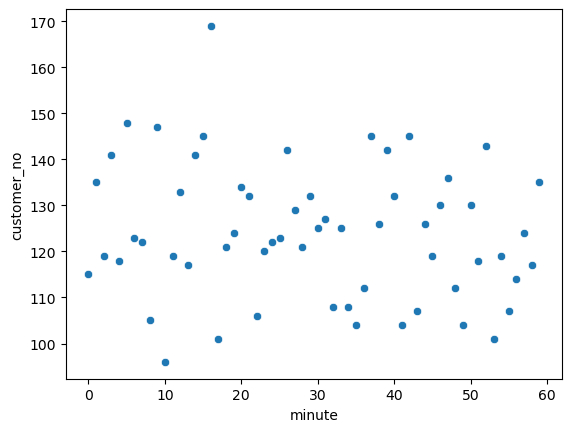

In [289]:
sns.scatterplot(x='minute', y='customer_no', data=df_time_minute);



<Axes: xlabel='hour'>

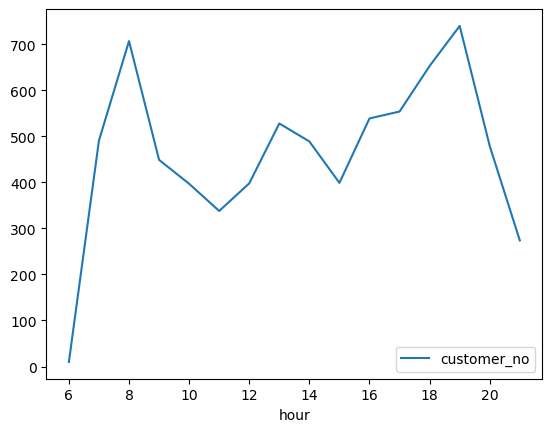

In [318]:
df_time_hourly.plot()

<Axes: ylabel='Density'>

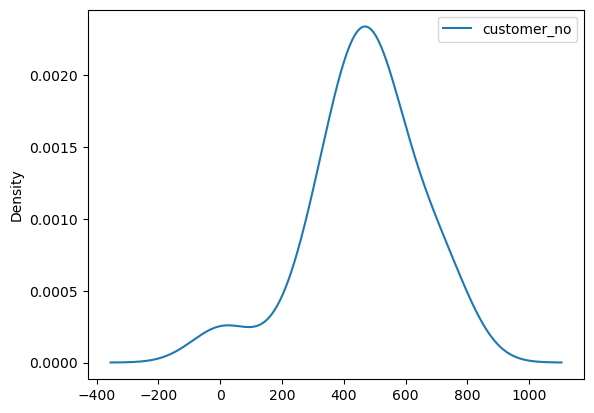

In [320]:
df_time_hourly.plot.kde()

<Axes: xlabel='hour'>

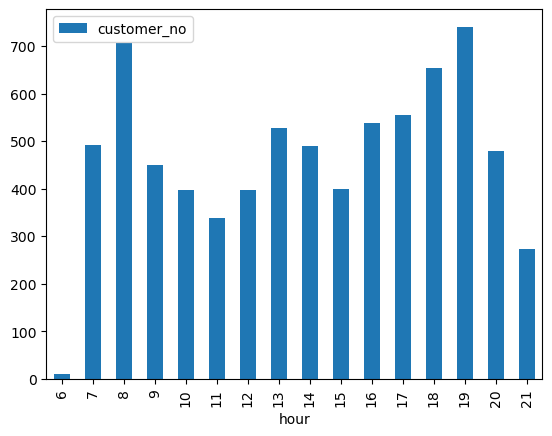

In [322]:
df_time_hourly.plot(kind='bar')

In [285]:
sum(df_time_hourly['customer_no'])

7445

In [331]:
df_time_hourly['customer_no'].value_counts().describe()

count    16.0
mean      1.0
std       0.0
min       1.0
25%       1.0
50%       1.0
75%       1.0
max       1.0
Name: customer_no, dtype: float64

In [323]:
df_time_hourly['customer_no'].describe()

count     16.000000
mean     465.312500
std      175.443331
min       10.000000
25%      397.750000
50%      484.000000
75%      542.750000
max      740.000000
Name: customer_no, dtype: float64

In [324]:
import scipy.stats as st
def get_best_distribution(data):
    dist_names = ["norm", "exponweib", "weibull_max", "weibull_min", "pareto", "genextreme"]
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

    return best_dist, best_p, params[best_dist]

In [325]:
get_best_distribution(df_time_hourly)

IndexError: index 208 is out of bounds for axis 0 with size 16

In [328]:
import matplotlib.pyplot as plt
import scipy
import scipy.stats

dist_names = ['gamma']#, 'beta', 'rayleigh', 'norm', 'pareto']

for dist_name in dist_names:
    dist = getattr(scipy.stats, dist_name)
    param = dist.fit(df_time_hourly['customer_no'])

In [329]:
param

(165.22485030842063, -1833.343297804684, 13.903713744492862)